Чтобы запускать и редактировать код, сохраните копию этого ноутбука на свой диск (File->Save a copy in Drive).

####Полезные ресурсы

*   Keras Datasets
    https://keras.io/datasets/#mnist-database-of-handwritten-digits

*   Информация о базе данных MNIST
    http://yann.lecun.com/exdb/mnist/index.html

*   NumPy в Python. Часть 1.
    https://habr.com/ru/post/352678/
    
*   PIL на Python от простого к сложному
    https://habr.com/ru/post/451074/
*   Шолле Ф.  "Глубокое обучение на Python"



####**Справка по RGB**

RGB - Red Green Blue - Красный Зеленый Синий

255.255.255. - белый

0.0.0 - черный

255.0.0 - красный

0.255.0 - зеленый

0.0.255 - синий

RGBA

A - альфа - прозрачность

**Тензор определяется тремя ключевыми атрибутами**

 **Количество осей (ранг)** — например, трехмерный тензор имеет три оси, а матрица — две. В библиотеках для Python, таких как Numpy, этот атрибут тензоров
имеет имя ndim.

 **Форма** — кортеж целых чисел, описывающих количество измерений на каждой
оси тензора. Например, матрица имеет форму (3, 5),
а трехмерный тензор имеет форму (3, 3, 5). Вектор имеет форму с единственным элементом, например (5,), тогда как скаляр имеет пустую форму ().

 **Тип данных** (обычно в библиотеках для Python ему дается имя dtype) — это тип
данных, содержащихся в тензоре; например, тензор может иметь тип float32,
uint8, float64 и др.

Источник: Ф. Шолле "Глубокое обучение на Python", 2.2.5. Ключевые атрибуты, стр. 57

####Загрузка необходимых ресурсов

In [ ]:
from tensorflow.keras.datasets import mnist # загрузка набора данных MNIST из Keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras import utils
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

####Загрузка датасета mnist из библиотеки Keras
Набор данных MNIST входит в состав Keras в форме набора из четырех массивов Numpy

In [ ]:
'''В Keras встроены средства работы с популярными наборами данных
x_train_org - изображения из набора данных для обучения
y_train_org - правильные ответы (метки) к набору данных для обучения
x_test_org - изображения из набора данных для тестирования
y_test_org - правильные ответы (метки) к набору данных для тестирования'''
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


####Параметры набора данных для обучения

In [ ]:
# определим тип объекта
type(x_train_org)

numpy.ndarray

In [ ]:
# определим тип объекта
type(y_train_org)

numpy.ndarray

In [ ]:
# посмотрим на размер набора данных для обучения
x_train_org.shape

(60000, 28, 28)

In [ ]:
# посмотрим на размер меток к набору данных для обучения
y_train_org.shape

(60000,)

In [ ]:
# длина набора данных для обучения
len(x_train_org)

60000

In [ ]:
# длина набора меток для данных для обучения
len(y_train_org)

60000

In [ ]:
# число осей массива данных для обучения
x_train_org.ndim

3

In [ ]:
# число осей массива данных для обучения
y_train_org.ndim

1

####Визуализация данных

In [ ]:
x_train_org

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
# посмотрим на элемент из набора данных для обучения
x_train_org[45:46]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0

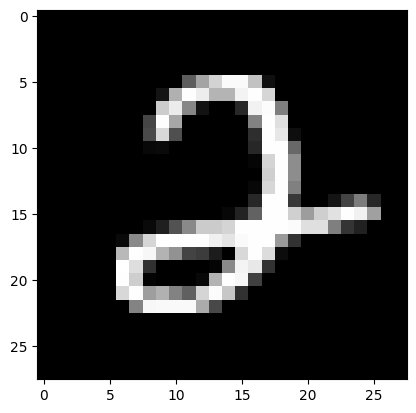

In [ ]:
n = 16
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGBA'))
plt.show()

In [ ]:
y_train_org[16]

2

In [ ]:
y_train_org[10:18]

array([3, 5, 3, 6, 1, 7, 2, 8], dtype=uint8)

In [ ]:
y_train_org

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Метки хранятся в массиве Numpy от 0 до 9

In [ ]:
y_train_org.min()

0

In [ ]:
y_train_org.max()

9

####Предварительная обработка набора данных для обучения. Нормализация данных.
Преобразуем набор данных для обучения в массив (60000, 28 * 28)

In [ ]:
x_train= x_train_org.reshape(60000, 784) # 28 * 28 = 784

In [ ]:
# посмотрим на форму массива
x_train.shape

(60000, 784)

In [ ]:
# посмотрим на количество осей
x_train.ndim

2

Преобразуем данные в массив типа float32 со значениями в интервале [0, 1]

In [ ]:
x_train = x_train.astype('float32')
x_train = x_train/255

In [ ]:
x_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

####Преобразуем метки в формат one hot encoding

In [ ]:
y_train = utils.to_categorical(y_train_org, 10)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_train[16]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

####Загружаем свою картинку

In [ ]:
uploaded = files.upload()

Saving 4.jpg to 4.jpg


In [ ]:
# проверяем загрузку картинки
!ls

4.jpg  sample_data


In [ ]:
# посмотрим на исходный размер изображения
image_initial = Image.open("4.jpg")
(width, height) = image_initial.size
image_initial.size

(1250, 1250)

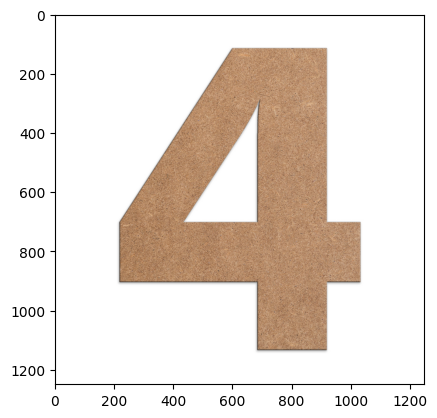

In [ ]:
plt.imshow(image_initial)

In [ ]:
# определим тип исходного изображения
type(image_initial)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
# преобразуем формат изображения в 28х28
img_path = '4.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

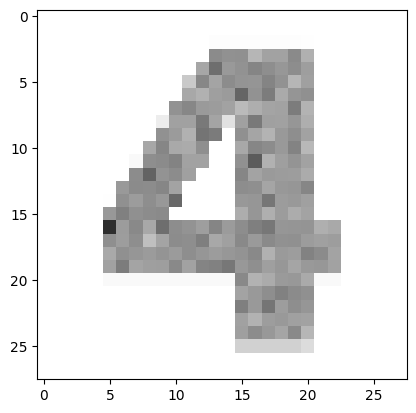

In [ ]:
plt.imshow(img.convert('RGBA'))
plt.show()

In [ ]:
# определим тип изображения
type(img)

PIL.Image.Image

In [ ]:
# преобразуем картинку в массив
x=image.img_to_array(img)

In [ ]:
# посмотрим на форму массива
x.shape

(28, 28, 1)

In [ ]:
# определим тип изображения после преобразования
type(x)

numpy.ndarray

In [ ]:
# определим тип переменных, хранящихся в массиве
x.dtype

dtype('float32')

In [ ]:
# изменим форму массива
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255-x
# Нормализуем изображение
x/=255

In [ ]:
# посмотрим на форму массива
x.shape

(1, 784)

In [ ]:
# посмотрим на массив
x

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.00784314, 0.00784314, 0.00784314, 0.00

####Обратные действия - из массива в изображение

In [ ]:
x.shape

(1, 784)

In [ ]:
# изменим форму массива
x_img = x.reshape(28, 28)

In [ ]:
x_img.shape

(28, 28)

In [ ]:
# уберем нормализацию нормализацию изображения
x_img *= 255

In [ ]:
# посмотрим на преобразованный массив
x_img

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 116., 110., 111.,  73.,  93.,  93., 117.,  79.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  89., 145., 102., 109., 122., 113., 104., 114.,  97.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

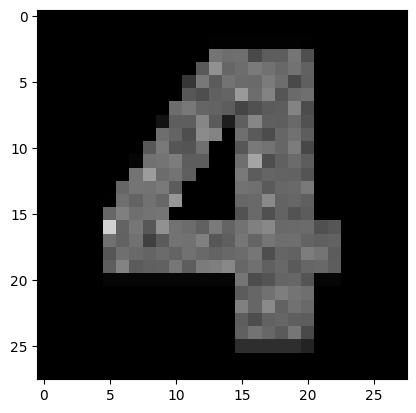

In [ ]:
# выполним конвертацию из массива в изображение, сохранив инвертирование
plt.imshow(Image.fromarray(x_img).convert('RGBA'))
plt.show()

####Повторим предыдущие действия для изображения другого формата

In [ ]:
img_1 = image.load_img(img_path, target_size=(8, 8), color_mode = "grayscale")

In [ ]:
img_1.size

(8, 8)

In [ ]:
#Преобразуем картинку в массив
x_1=image.img_to_array(img_1)

In [ ]:
x_1.shape

(8, 8, 1)

In [ ]:
x_1

array([[[255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.]],

       [[255.],
        [255.],
        [255.],
        [141.],
        [159.],
        [138.],
        [255.],
        [255.]],

       [[255.],
        [255.],
        [255.],
        [170.],
        [148.],
        [170.],
        [255.],
        [255.]],

       [[255.],
        [255.],
        [155.],
        [253.],
        [181.],
        [144.],
        [255.],
        [255.]],

       [[255.],
        [143.],
        [135.],
        [148.],
        [161.],
        [149.],
        [175.],
        [255.]],

       [[255.],
        [130.],
        [145.],
        [147.],
        [151.],
        [143.],
        [163.],
        [255.]],

       [[255.],
        [255.],
        [255.],
        [255.],
        [171.],
        [141.],
        [255.],
        [255.]],

       [[255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [2

In [ ]:
# изменим форму массива в плоский вектор
x_1=x_1.reshape(1, 64)

In [ ]:
x_1

array([[255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        141., 159., 138., 255., 255., 255., 255., 255., 170., 148., 170.,
        255., 255., 255., 255., 155., 253., 181., 144., 255., 255., 255.,
        143., 135., 148., 161., 149., 175., 255., 255., 130., 145., 147.,
        151., 143., 163., 255., 255., 255., 255., 255., 171., 141., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255.]],
      dtype=float32)

In [ ]:
# Инвертируем изображение
x_1=255-x_1
# Нормализуем изображение
x_1/=255

In [ ]:
x_1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.44705883, 0.3764706 , 0.45882353, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.33333334,
        0.41960785, 0.33333334, 0.        , 0.        , 0.        ,
        0.        , 0.39215687, 0.00784314, 0.2901961 , 0.43529412,
        0.        , 0.        , 0.        , 0.4392157 , 0.47058824,
        0.41960785, 0.36862746, 0.41568628, 0.3137255 , 0.        ,
        0.        , 0.49019608, 0.43137255, 0.42352942, 0.40784314,
        0.4392157 , 0.36078432, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.32941177, 0.44705883, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]], dtype=float32)

####Задание

1. Изучите блокнот, повторите его для тестового набора данных, дополните своими комментариями.
2. Загрузите свое изображение, выполните все указанные преобразования для подготовки данных для нейронной сети.
3. Изучите какие датасеты доступны в библиотеке Keras https://keras.io/datasets/#mnist-database-of-handwritten-digits.
